# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

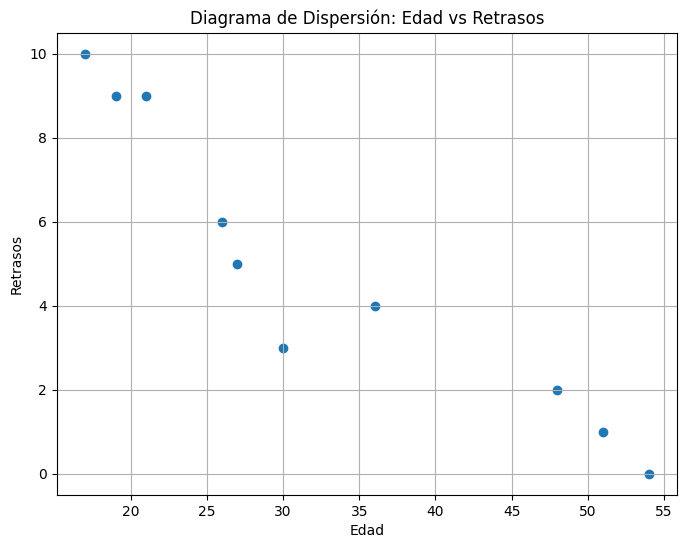

In [5]:
# Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Edad'], student_data['Retrasos'])
plt.title('Diagrama de Dispersión: Edad vs Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.grid()
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Los jóvenes suelen tener más retraso.. este disminuye a medida que aumenta la edad.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Crear un DataFrame
df =  pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

# Variables independiente y dependiente
X = df[['Edad']]  # Variable independiente
y = df['Retrasos']  # Variable dependiente

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Coeficientes del modelo
coef = model.coef_[0]
intercept = model.intercept_

# Predicciones
y_pred = model.predict(X)

# Imprimir los coeficientes
print(f'Coeficiente: {coef}')
print(f'Intercepción: {intercept}')

Coeficiente: -0.2428207709159809
Intercepción: 12.888803363135771


Grafica tu modelo de regresión en tu diagrama de dispersión.

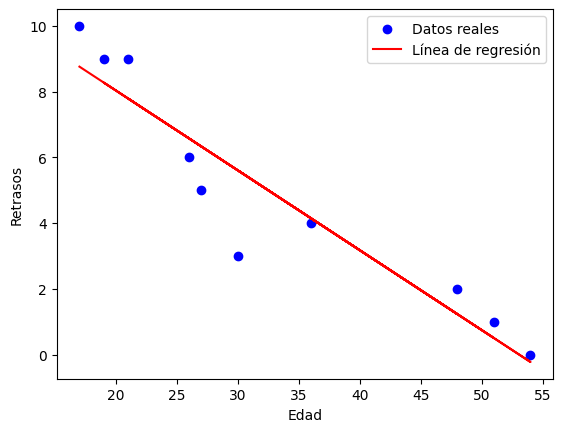

In [7]:
## Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

Nuestra variable de resultado (variable dependiente) es "Retrasos".
Estamos utilizando una regresión lineal para modelar la relación entre la edad y los retrasos.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import any libraries you may need & the data
df = pd.read_csv(r'C:\Users\user\Documents\ironhack\06.24\ML\lab-regression-analysis-es-main\lab-regression-analysis-es-main\vehicles.csv')


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [9]:
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [10]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

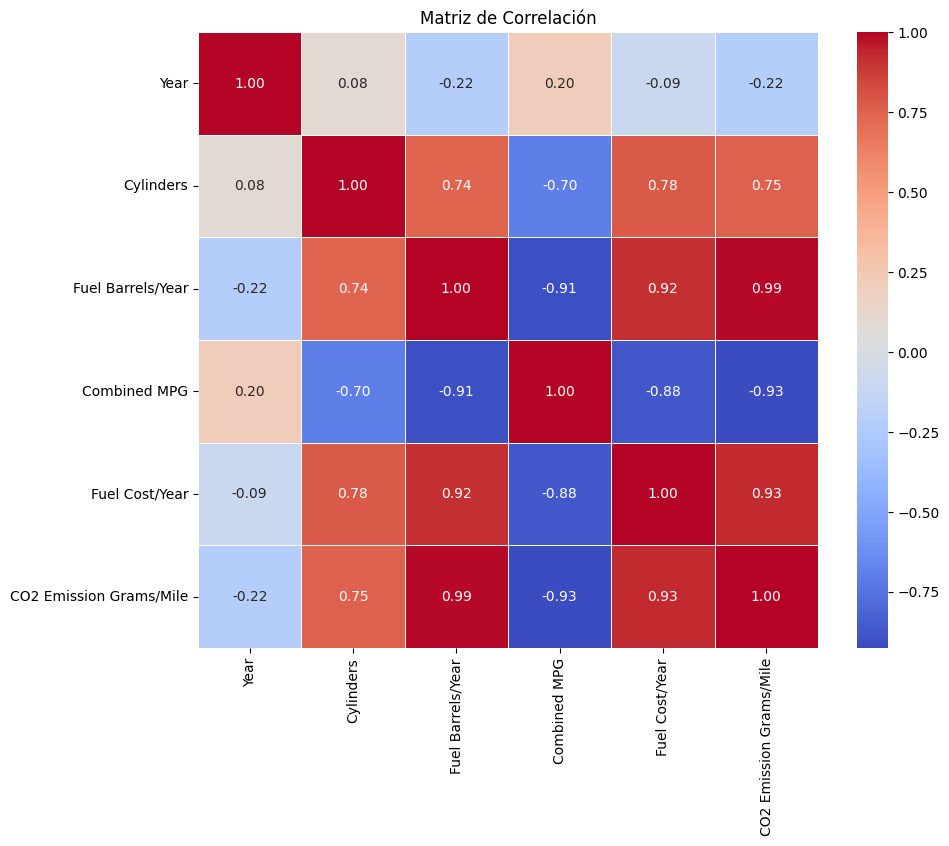

In [12]:

# Seleccionar las variables de interés y la variable de resultado
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
result_variable = 'CO2 Emission Grams/Mile'

# Calcular las correlaciones
# Se calculan las correlaciones entre todas las variables de interés, incluyendo la variable de resultado (CO2 Emission Grams/Mile)
correlation_matrix = df[variables + [result_variable]].corr()

# Imprimir la matriz de correlación
# print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [13]:
# # Extraer las correlaciones con la variable de resultado
# correlations[result_variable]: Selecciona la columna de la matriz de correlaciones que corresponde a la variable de resultado (CO2 Emission Grams/Mile). Esta columna contiene las correlaciones de CO2 Emission Grams/Mile con cada una de las otras variables en el DataFrame.
# .drop(result_variable): Elimina la correlación de CO2 Emission Grams/Mile consigo misma (que siempre sería 1). Esto deja solo las correlaciones entre CO2 Emission Grams/Mile y las otras variables de interés (Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year).

correlations_with_result = correlation_matrix[result_variable].drop(result_variable)
print(correlations_with_result)

# Ordenar por valor absoluto de las correlaciones para identificar las más y menos informativas
# .abs() Esto convierte todas las correlaciones en valores absolutos, eliminando el signo positivo o negativo
# sort_values(ascending=False) Esto ordena las correlaciones en orden descendente, de la más fuerte a la más débil
sorted_correlations = correlations_with_result.abs().sort_values(ascending=False)
print("\nOrdeno los resultados de mayor a menor relación en valores absolutos\n", sorted_correlations)


Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Ordeno los resultados de mayor a menor relación en valores absolutos
 Fuel Barrels/Year    0.986189
Fuel Cost/Year       0.930865
Combined MPG         0.926229
Cylinders            0.752393
Year                 0.222300
Name: CO2 Emission Grams/Mile, dtype: float64


 ### ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2?
Fuel Barrels/Year -- tiene la correlación más fuerte con CO2 Emission Grams/Mile (0.98).

### ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2?
La variable menos importante: Year tiene la correlación más débil con CO2 Emission Grams/Mile (0.23).

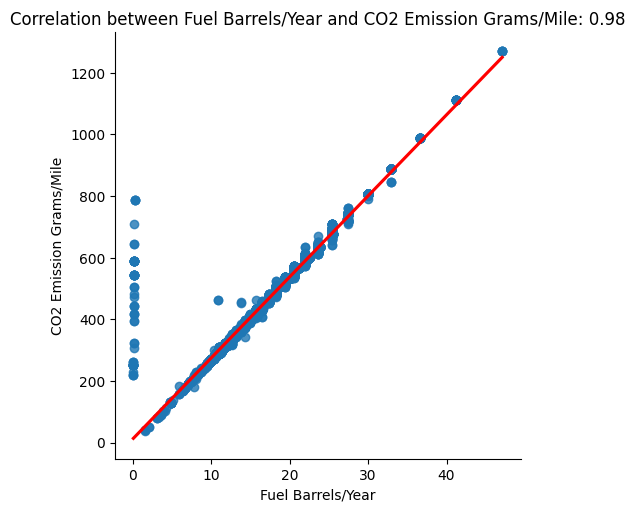

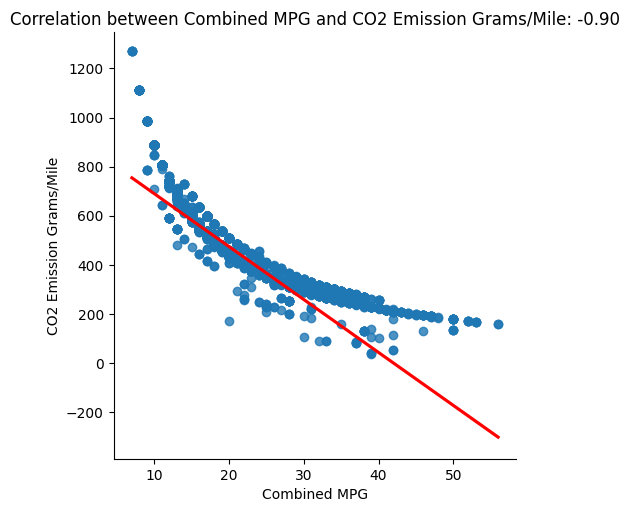

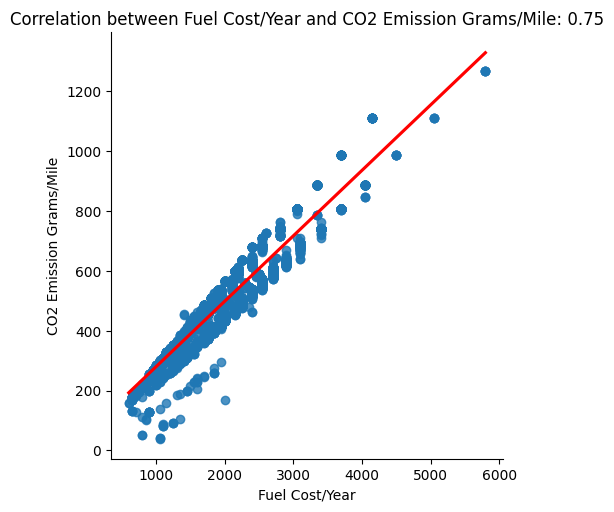

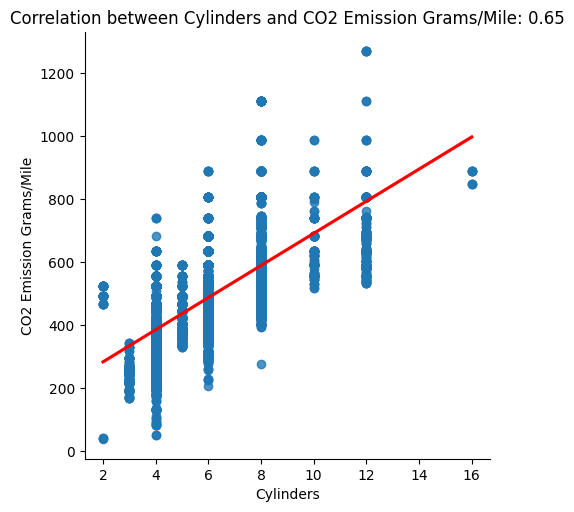

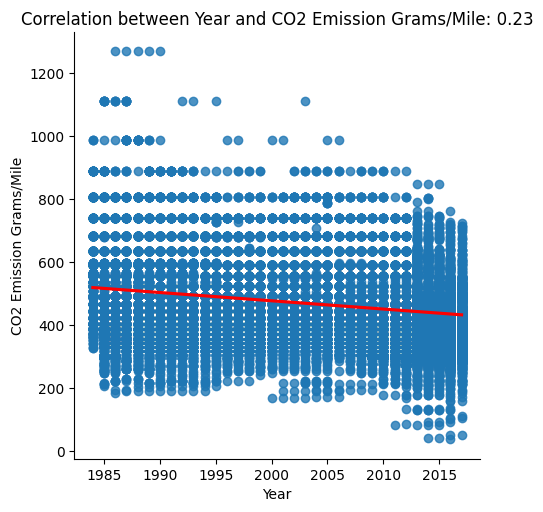

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que top_pairs contiene las variables y su correlación entre sí
top_pairs = [
    {'Variable1': 'Fuel Barrels/Year', 'Variable2': 'CO2 Emission Grams/Mile', 'Correlation': 0.98},
    {'Variable1': 'Combined MPG', 'Variable2': 'CO2 Emission Grams/Mile', 'Correlation': -0.90},
    {'Variable1': 'Fuel Cost/Year', 'Variable2': 'CO2 Emission Grams/Mile', 'Correlation': 0.75},
    {'Variable1': 'Cylinders', 'Variable2': 'CO2 Emission Grams/Mile', 'Correlation': 0.65},
    {'Variable1': 'Year', 'Variable2': 'CO2 Emission Grams/Mile', 'Correlation': 0.23}
]

# Iterar sobre los pares de variables con mayor correlación
for row in top_pairs:
    var1 = row['Variable1']
    var2 = row['Variable2']
    correlation = row['Correlation']
    
    # Crear el gráfico de dispersión con línea de regresión
    sns.lmplot(x=var1, y=var2, data=df, line_kws={'color': 'red'})
    plt.title(f'Correlation between {var1} and {var2}: {correlation:.2f}')
    plt.show()

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [15]:
from sklearn.linear_model import LinearRegression

# Definir las variables predictoras (X) y la variable de resultado (y)
X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]  # Variables predictoras
y = df['CO2 Emission Grams/Mile']  # Variable de resultado

# Crear el modelo de regresión lineal múltiple
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Obtener los coeficientes de regresión
coefficients = model.coef_

# Obtener el intercepto
intercept = model.intercept_


# Imprimir los resultados
print("Coeficientes de regresión:")
for i, coef in enumerate(coefficients):
    print(f"Variable {X.columns[i]}: {coef:.2f}")

print(f"\nIntercept: {intercept:.2f}")

# Calcular la puntuación R-cuadrado
r_squared = model.score(X, y)
print(f"\nPuntuación R-cuadrado: {r_squared:.2f}")

#(model.coef_) que representan los efectos de las variables predictoras en la variable de resultado. Más alto
#(model.intercept_) que es el valor esperado de y cuando todas las variables predictoras son 0.  Más bajo

#se aplica una regresión lineal ya que los resultados asi lo indican

Coeficientes de regresión:
Variable Year: -0.32
Variable Cylinders: 1.88
Variable Fuel Barrels/Year: 19.05
Variable Combined MPG: -3.04
Variable Fuel Cost/Year: 0.03

Intercept: 769.89

Puntuación R-cuadrado: 0.98


La puntuación R-cuadrado de 0.98 indica que el 98% de la varianza en las emisiones de CO2 es explicada por el modelo de regresión lineal múltiple. Esto significa que el modelo tiene un muy buen ajuste a los datos y es capaz de explicar la mayor parte de la variabilidad en la variable objetivo

In [16]:
import statsmodels.api as sm
# Seleccionar las variables predictoras y la variable de resultado
predictors = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
result_variable = 'CO2 Emission Grams/Mile'

# Añadir una constante para el término independiente
X = sm.add_constant(df[predictors])
y = df[result_variable]

# Crear el modelo de regresión lineal
model = sm.OLS(y, X)

# Ajustar el modelo
results = model.fit()

# Imprimir los resultados del modelo
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                             12:53:32   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [17]:
# La tendecia de los datos son lineales.. por lo que lo ideal es sacar una regresión lineal..

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

Interpretación de los resultados:

Variables más importantes:

Fuel Barrels/Year: Con un coeficiente de 19.0532 y un p-valor < 0.001, esta variable es la más importante en el modelo. Esto indica que el consumo de combustible tiene un impacto significativo en las emisiones de CO2.

Combined MPG: Con un coeficiente de -3.0392 y un p-valor < 0.001, esta variable también es muy importante. El consumo combinado de combustible está inversamente relacionado con las emisiones de CO2, lo cual tiene sentido.

Cylinders: Con un coeficiente de 1.8793 y un p-valor < 0.001, el número de cilindros también es una variable importante. Esto sugiere que los motores con más cilindros tienden a tener mayores emisiones de CO2.


Conclusiones y confianza en el modelo:

El modelo de regresión lineal múltiple explica el 98.2% de la varianza en las emisiones de CO2 (R-cuadrado ajustado de 0.981), lo cual indica un ajuste muy bueno a los datos.

Todos los coeficientes de regresión son estadísticamente significativos (p-valores < 0.001), lo que significa que cada una de las variables predictoras contribuye de manera significativa a la explicación de las emisiones de CO2.

Los signos de los coeficientes de regresión son lógicos y coherentes con la teoría y el conocimiento previo sobre los factores que afectan las emisiones de CO2 en los vehículos.

Dado el excelente ajuste del modelo y la significancia estadística de las variables predictoras, puedo estar bastante confiado en las conclusiones obtenidas a partir de este modelo de regresión lineal múltiple.


En resumen, este modelo de regresión lineal múltiple proporciona una comprensión sólida de los factores que influyen en las emisiones de CO2 de los vehículos. Las variables más importantes son el consumo de combustible, el consumo combinado de combustible y el número de cilindros del motor. Estos resultados pueden ser valiosos para informar decisiones y políticas relacionadas con la eficiencia de combustible y las emisiones de los vehículos.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [18]:
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}

df = pd.DataFrame(data)

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

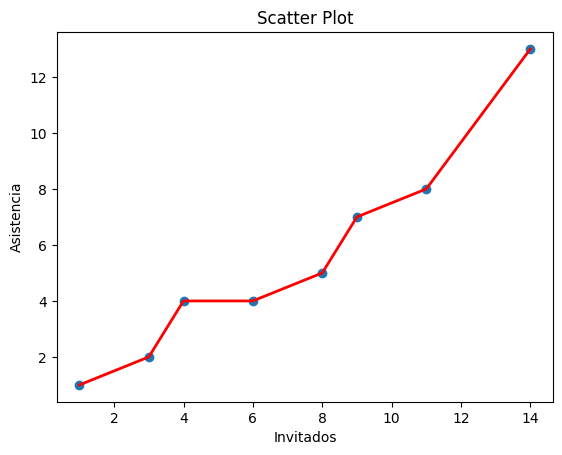

In [19]:
# Crear el gráfico de dispersión
plt.scatter(df['X'], df['Y'], label='Datos')
plt.plot(df['X'], df['Y'], color='red', linewidth=2, label='Línea de Predicción')
plt.xlabel('Invitados')
plt.ylabel('Asistencia')
plt.title('Scatter Plot')
plt.show()

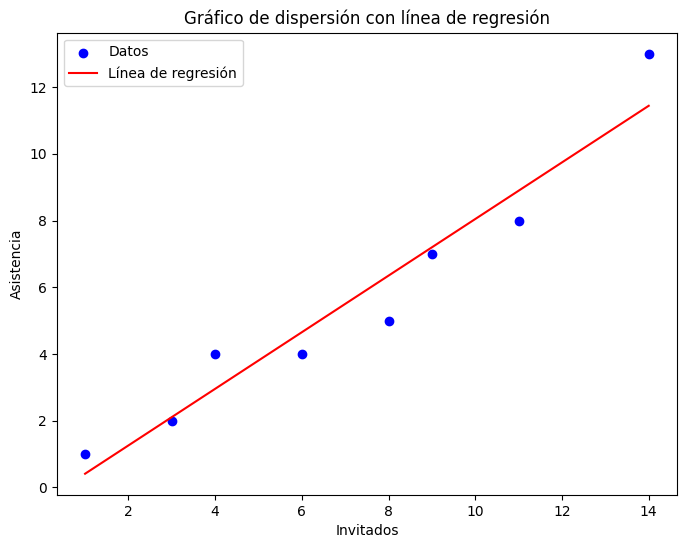

In [20]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(df[['X']], df['Y'])

# Obtener los coeficientes de regresión
coefficients = model.coef_[0]
intercept = model.intercept_

# Crear los valores predichos
df['Y_pred'] = coefficients * df['X'] + intercept

# Crear el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], color='blue', label='Datos')
#linea de los valores predichos
plt.plot(df['X'], df['Y_pred'], color='red', label='Línea de regresión')
plt.xlabel('Invitados')
plt.ylabel('Asistencia')
plt.title('Gráfico de dispersión con línea de regresión')
plt.legend()
plt.show()

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

In [21]:
# Imprimir los resultados de la regresión
print('Coeficiente de regresión (pendiente):', model.coef_[0])
print('Intercepto:', model.intercept_)
print('Coeficiente de determinación (R-cuadrado):', model.score(df[['X']], df['Y']))

Coeficiente de regresión (pendiente): 0.8484848484848485
Intercepto: -0.43939393939393945
Coeficiente de determinación (R-cuadrado): 0.9316696375519905


Interpretación de los resultados:


El coeficiente de regresión (pendiente) es 0.84, lo que significa que, en promedio, un aumento de una unidad en X se asocia con un aumento de  0.84 unidades en Y, manteniendo todo lo demás constante.

El intercepto es  -0.43, lo que indica que cuando X es cero, se espera que Y tenga un valor de  -0.43.

El coeficiente de determinación (R-cuadrado) es 0.93, lo que significa que aproximadamente el 93.17% de la varianza en Y se explica por la varianza en X en el modelo de regresión lineal.


En resumen, el gráfico y los resultados de la regresión indican que existe una relación lineal positiva moderadamente fuerte entre X e Y. El modelo de regresión lineal parece ajustarse bien a los datos, ya que el R-cuadrado es alto (93.17%). Esto significa que la mayor parte de la variabilidad en la variable de respuesta puede ser explicada por la variable predictora. 

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [22]:
# como outlier decido eliminar el último dato de x e y

df = df.drop([len(df) - 1])

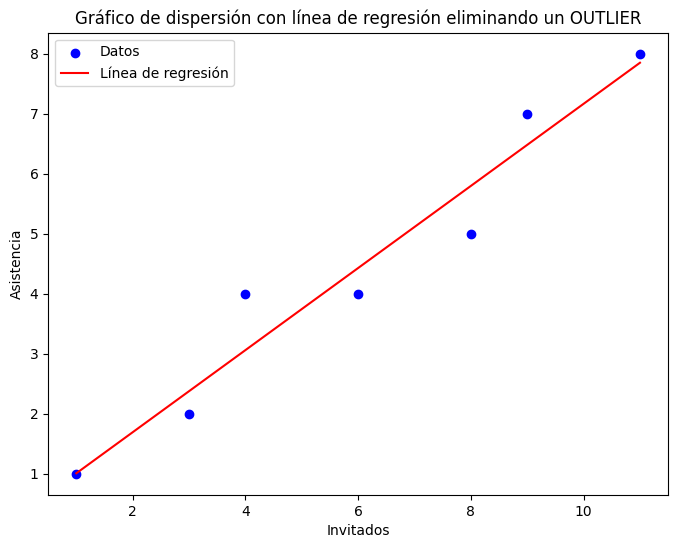

In [23]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(df[['X']], df['Y'])

# Obtener los coeficientes de regresión
coefficients = model.coef_[0]
intercept = model.intercept_

# Crear los valores predichos
df['Y_pred'] = coefficients * df['X'] + intercept

# Crear el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], color='blue', label='Datos')
#linea de los valores predichos
plt.plot(df['X'], df['Y_pred'], color='red', label='Línea de regresión')
plt.xlabel('Invitados')
plt.ylabel('Asistencia')
plt.title('Gráfico de dispersión con línea de regresión eliminando un OUTLIER')
plt.legend()
plt.show()

In [24]:
# Imprimir los resultados de la regresión
print('Coeficiente de regresión (pendiente):', model.coef_[0])
print('Intercepto:', model.intercept_)
print('Coeficiente de determinación (R-cuadrado):', model.score(df[['X']], df['Y']))

Coeficiente de regresión (pendiente): 0.6842105263157894
Intercepto: 0.32330827067669254
Coeficiente de determinación (R-cuadrado): 0.9433811802232855


¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*

el valor del cálculo de R2 se ajusto más a los datos en un 94,3%. 
El modelo se ajusta muy bien a los datos observados. La línea de regresión estimada se acerca más a los puntos de datos.
Explica una alta proporción de la variabilidad en la variable dependiente y refleja una relación lineal fuerte entre las variables, lo cual se traduce en predicciones más precisas.